# SENYALS I SISTEMES: PRÀCTICA 1

## Preparació de merdes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import pandas as pd

In [2]:
def myconvolve(x, h):
    N = x.size
    M = h.size
    P = M - 1 #Modify this line
    x_padded = np.concatenate((np.zeros(P), x, np.zeros(P)))
    L = M + N - 1
    y = np.zeros(L)
    h_rev = h[::-1]
    for n in range(L):
        y[n] = np.sum(x_padded[n:n+M]*h_rev)
    return y

In [3]:
def plot3(i, nx, x, nh, h, ny, y):
    plt.figure(i)
    ax3 = plt.subplot(3,1,3)
    plt.stem(ny, y, use_line_collection=True)
    plt.subplot(3,1,1, sharex=ax3)
    plt.stem(nx, x, use_line_collection=True)
    plt.subplot(3,1,2, sharex=ax3)
    plt.stem(nh, h, use_line_collection=True)

In [4]:
n = np.arange(-5,21)
h1 = 1.0*(n >= 0)
h2 = np.zeros_like(n); h2[(n==0)]=1; h2[(n==1)]=-1
x1 = np.zeros_like(n) + (n >= 0)*(n < 6)
x2 = h1

## Compute convolutions

In [5]:
ya = convolve(x1, h1)
yb = convolve(x1, h2)
yc = convolve(x2, h1)
yd = convolve(x2, h2)

plt.close('all')
ny = np.arange(2*min(n), 2*max(n)+1)

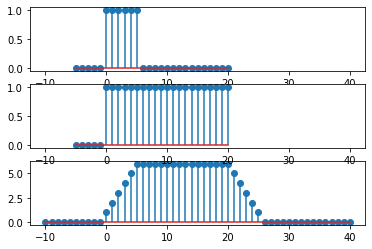

In [6]:
plot3(1, n, x1, n, h1, ny, ya)

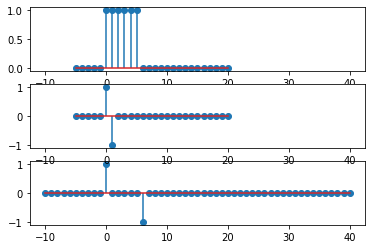

In [7]:
plot3(1, n, x1, n, h2, ny, yb)

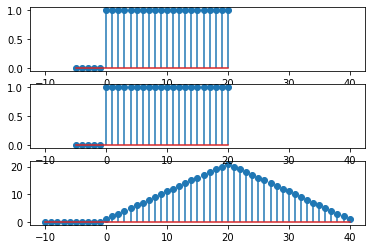

In [8]:
plot3(1, n, x2, n, h1, ny, yc)

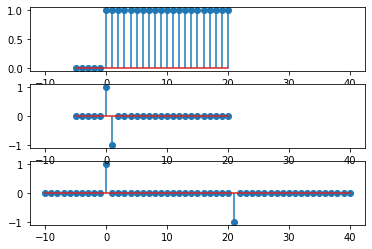

In [9]:
plot3(1, n, x2, n, h2, ny, yd)

<StemContainer object of 3 artists>

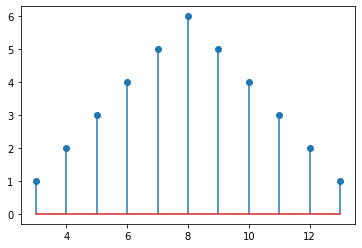

In [10]:
p = np.ones(6)
z = convolve(p, p)
plt.close('all')
n = np.arange(0, 6)
nz = np.arange(3,14) #Modify this line
plt.stem(nz, z, use_line_collection=True)

In [11]:
z1 = convolve(x1,x2)
z2 = myconvolve(x2,x1)
print(z2 == z1)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


**Removing short term variations from a signal**

<IPython.core.display.Javascript object>


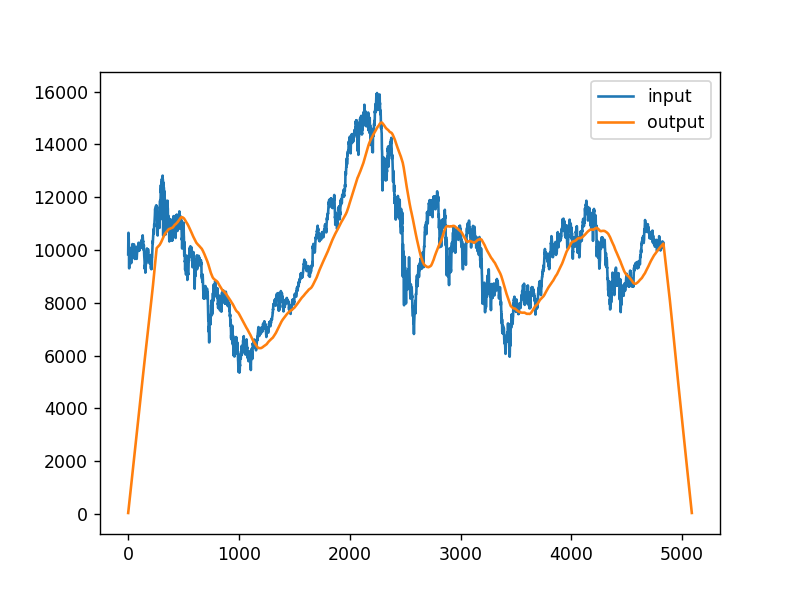

In [114]:
df = pd.read_excel('Ibex35.xlsx', sheet_name='Hoja1')
x = df['Ibex 35'].values
f = df['fecha'].values
plt.close('all')
plt.plot(x, label='input')
M = 257
h0 = np.ones(M); h0/=M #Modify this line
y = convolve(x, h0)
# k = 1/2
# modifier = np.arange(0.0,len(y)); modifier*=k
# plt.plot(modifier, y, label='output')
plt.plot(y, label='output')
plt.legend(loc='best')

In [15]:
print(h0)

[0.2 0.2 0.2 0.2 0.2]


In [115]:
%matplotlib notebook

<IPython.core.display.Javascript object>


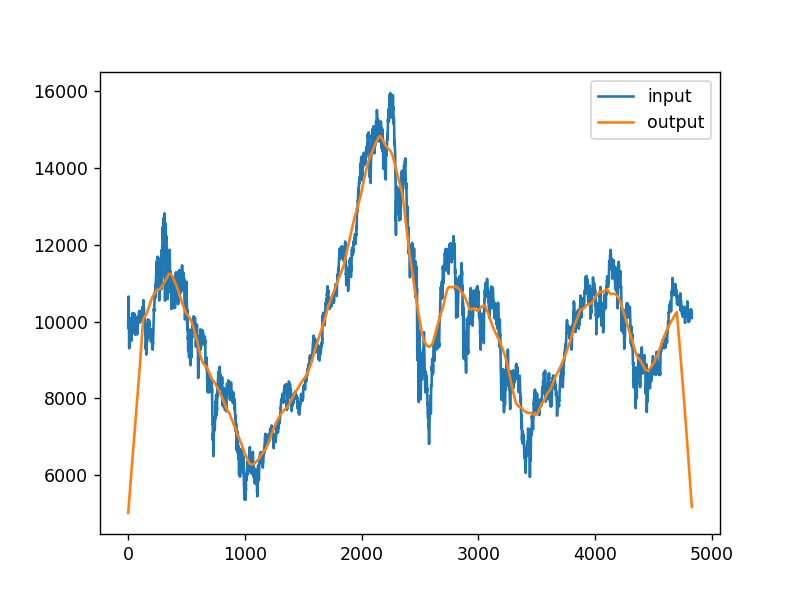

In [116]:
plt.close('all')
plt.plot(x, label='input')
y = convolve(x, h0, mode='same')
# k = 1/2
# modifier = np.arange(0.0,len(y)); modifier*=k
# plt.plot(modifier, y, label='output')
plt.plot(y, label='output')
plt.legend(loc='best')

In [58]:
print(len(x)==len(y))

True


In [117]:
print(y[0])
print(x[0]/M)

5020.376264591439
38.27470817120623


In [68]:
p = np.array([ 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1])
s = np.load('signals.npy')
id = 4 #select one of the signals
x = s[id]
#Find the pattern

In [86]:
r_p = p[::-1]
y = convolve(x,r_p)

In [99]:
print(r_p,p)
print(len(x))
print(len(p))

[ 1  1  1 -1 -1  1 -1  1  1  1 -1 -1  1] [ 1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1]
1024
13


<IPython.core.display.Javascript object>


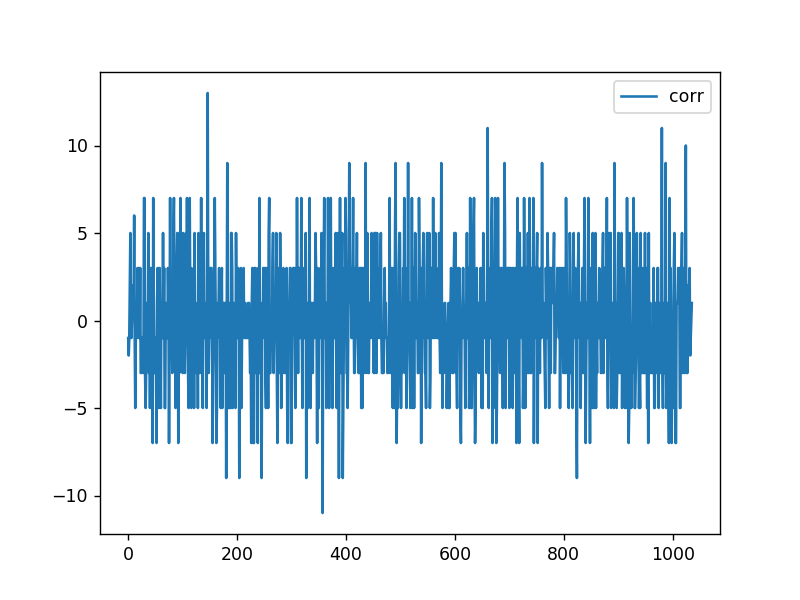

In [100]:
plt.close('all')
plt.plot(y, label='corr')
plt.legend(loc='best')

In [113]:
print(x[134:147]==p)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
